In [ ]:
# import cv2
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
# import os

In [ ]:
# # First, let's find where OpenCV installed its Haar cascades
# def find_haar_cascade():
#     """Find the path to Haar cascade files"""
#     # Common locations
#     possible_paths = [
#         '/opt/anaconda3/share/opencv4/haarcascades/',
#         '/opt/anaconda3/lib/python3.12/site-packages/cv2/data/',
#         '/usr/local/share/opencv4/haarcascades/',
#         '/opt/homebrew/share/opencv4/haarcascades/'  # For M1/M2 Macs
#     ]
    
#     for path in possible_paths:
#         if os.path.exists(path):
#             print(f"Found Haar cascades at: {path}")
#             return path
    
#     # If not found, let's search the system
#     print("Searching for Haar cascade files...")
#     try:
#         import cv2
#         # Get the path where cv2 is installed
#         cv2_path = os.path.dirname(cv2.__file__)
#         data_path = os.path.join(cv2_path, 'data')
#         if os.path.exists(data_path):
#             return data_path
#     except:
#         pass
    
#     return None

# # Find the cascade path
# cascade_path = find_haar_cascade()

# if cascade_path:
#     face_cascade_path = os.path.join(cascade_path, 'haarcascade_frontalface_default.xml')
#     print(f"Using cascade file: {face_cascade_path}")
# else:
#     print("Haar cascade not found. Let's use direct path...")
#     face_cascade_path = 'haarcascade_frontalface_default.xml'

Found Haar cascades at: /opt/anaconda3/share/opencv4/haarcascades/
Using cascade file: /opt/anaconda3/share/opencv4/haarcascades/haarcascade_frontalface_default.xml


In [ ]:
# # Load your image
# def load_image(image_name):
#     """Load image from content folder"""
#     pil_image = Image.open(f'img/yoh.jpg')
#     img = np.array(pil_image)
#     return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV


In [ ]:
# # Load your image
# img = load_image('yoh.jpg')

In [ ]:
# def detect_faces(image):
#     """Detect faces in an image using Haar Cascade"""
#     # Convert to grayscale (face detection works better on grayscale)
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # Load the pre-trained face detector
#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
#     # Detect faces
#     faces = face_cascade.detectMultiScale(
#         gray,
#         scaleFactor=1.1,    # How much the image size is reduced at each scale
#         minNeighbors=5,     # How many neighbors each candidate rectangle should have
#         minSize=(30, 30)    # Minimum object size
#     )
    
#     return faces, gray

# # Detect faces
# faces, gray_image = detect_faces(img)
# print(f"Number of faces detected: {len(faces)}")

Loading image...
Image loaded. Shape: (4000, 3200, 3)
Detecting faces...
Number of faces detected: 3
Faces highlighted with bounding boxes


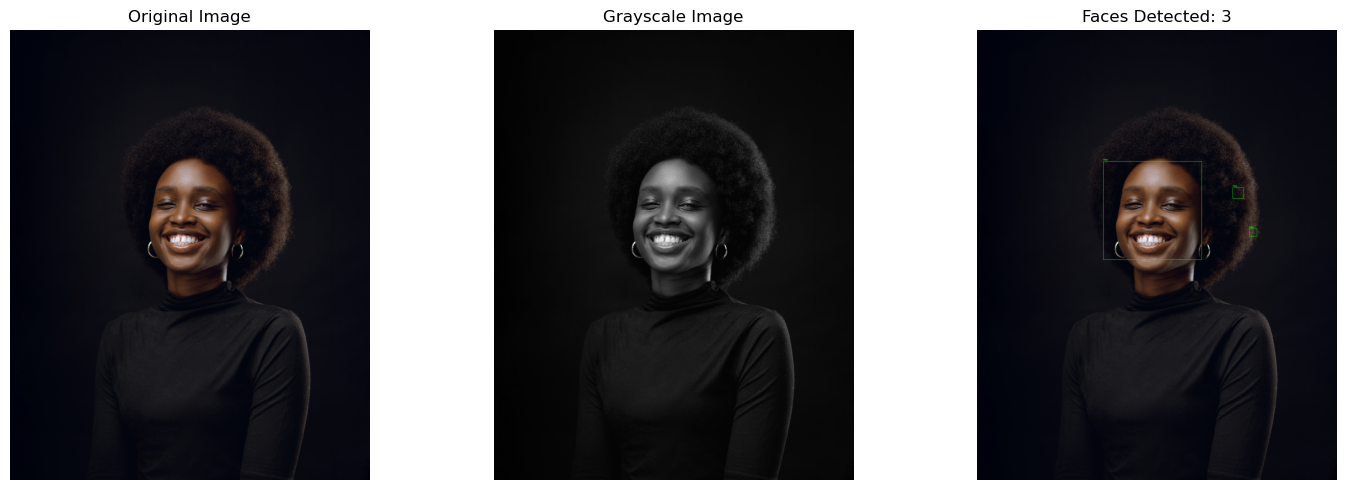


=== FACE DETECTION RESULTS ===
Total faces found: 3
Face 1: Position (x=1123, y=1167), Size (w=874, h=874)
Face 2: Position (x=2273, y=1400), Size (w=97, h=97)
Face 3: Position (x=2421, y=1766), Size (w=67, h=67)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ithelp/Downloads/Code/opencv/geeksforgeeks/face_det/content/face_detection_result.jpg'

In [12]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load your image
def load_image(image_name):
    """Load image from content folder"""
    pil_image = Image.open(f'img/yoh.jpg')
    img = np.array(pil_image)
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV

# Face detection function
def detect_faces(image):
    """Detect faces in an image using Haar Cascade"""
    # Convert to grayscale (face detection works better on grayscale)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load the pre-trained face detector from the found path
    cascade_path = '/opt/anaconda3/share/opencv4/haarcascades/haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cascade_path)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,    # How much the image size is reduced at each scale
        minNeighbors=5,     # How many neighbors each candidate rectangle should have
        minSize=(30, 30)    # Minimum object size
    )
    
    return faces, gray

# Draw bounding boxes
def draw_face_boxes(image, faces):
    """Draw bounding boxes around detected faces"""
    img_with_boxes = image.copy()
    
    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(img_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)
        # Add text
        cv2.putText(img_with_boxes, 'Face', (x, y-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return img_with_boxes

# Load your image
print("Loading image...")
img = load_image('Sample_CV.webp')
print(f"Image loaded. Shape: {img.shape}")

# Detect faces
print("Detecting faces...")
faces, gray_image = detect_faces(img)
print(f"Number of faces detected: {len(faces)}")

# Draw results
if len(faces) > 0:
    result_image = draw_face_boxes(img, faces)
    print("Faces highlighted with bounding boxes")
else:
    result_image = img
    print("No faces detected. Try adjusting detection parameters.")

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title(f'Faces Detected: {len(faces)}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print detailed results
print(f"\n=== FACE DETECTION RESULTS ===")
print(f"Total faces found: {len(faces)}")
for i, (x, y, w, h) in enumerate(faces):
    print(f"Face {i+1}: Position (x={x}, y={y}), Size (w={w}, h={h})")

# Save result if faces were found
if len(faces) > 0:
    output_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    output_pil = Image.fromarray(output_image)
    output_pil.save('content/face_detection_result.jpg')
    print("\nResult saved as 'content/face_detection_result.jpg'")